Imports

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data

In [157]:
raw_songs = pd.read_csv('taylor_swift_spotify.csv')

assert (raw_songs.index == raw_songs['Unnamed: 0']).all()
songs = raw_songs.drop(columns=['Unnamed: 0', 'id', 'uri'])
songs.head()

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,1,0.009420,0.757,0.610,0.000037,0.3670,-4.840,0.0327,116.998,0.685,66,212600
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,2,0.088500,0.733,0.733,0.000000,0.1680,-5.376,0.0670,96.057,0.701,67,231833
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,3,0.000421,0.511,0.822,0.019700,0.0899,-4.785,0.0397,94.868,0.305,68,231000
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,4,0.000537,0.545,0.885,0.000056,0.3850,-5.968,0.0447,92.021,0.206,67,235800
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],2023-10-27,5,0.000656,0.588,0.721,0.000000,0.1310,-5.579,0.0317,96.997,0.520,65,193289


Meaning of each variable: https://developer.spotify.com/documentation/web-api/reference/get-audio-features

Initial Plot

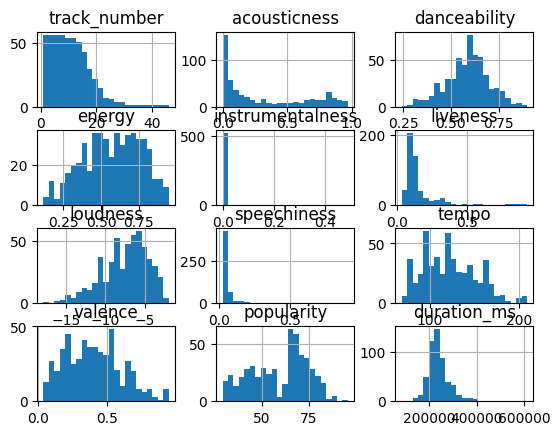

In [158]:
songs.hist(bins=23) 
plt.show()

Converting Release date to year as a float

In [152]:
songs['release_date'] = pd.to_datetime(songs['release_date'])

songs['release_date'] = songs['release_date'].dt.year + (songs['release_date'].dt.month - 1) / 12 + (songs['release_date'].dt.day - 1) / 365

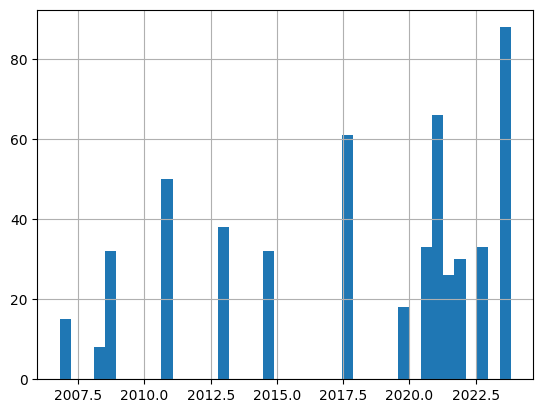

In [153]:
songs['release_date'].hist(bins=40)
plt.show()

In [ ]:
grouped_songs = songs.groupby('album')['popularity'].mean()
grouped_songs.plot(kind='bar')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.title('Mean popularity of albums')
plt.show()

In [ ]:
songs[songs.album == '1989 (Deluxe Edition)']

In [161]:
songs = songs[~songs.name.str.contains('Voice Memo')]

songs[songs.name.str.contains('Voice Memo')]

songs.to_csv('dropped_voice_memo.csv')

### removing voice memo

### Categorical Variables

### Combining Albums

In [ ]:
songs[songs['deluxe_album'] == True ]['popularity'].hist(bins=30, alpha=1)
songs[songs['deluxe_album'] == False]['popularity'].hist(bins=40, alpha=0.5)
plt.show()

In [ ]:
deluxe_wordings = ['deluxe', 'platinum']
songs['deluxe_album'] = songs['album'].str.contains('|'.join(deluxe_wordings), case=False)

songs_without_deluxe = songs[songs['deluxe_album'] == False]

songs['deluxe_album'].value_counts()

Deluxe edition

In [ ]:
plt.scatter(songs['track_number'], songs['popularity'], c=songs['album'].astype('category').cat.codes, alpha=0.5)

grouped_songs = songs.groupby('track_number')['popularity'].mean()

plt.scatter(grouped_songs.index, grouped_songs.values, c='red')
plt.xlabel('Track Number')
plt.ylabel('Popularity')
plt.title('Popularity of Songs Grouped by Track Number')
plt.show()

Track Number

In [ ]:
songs[songs['taylors_version'] == True ]['popularity'].hist(bins=20, alpha=1)
songs[songs['taylors_version'] == False]['popularity'].hist(bins=40, alpha=0.5)
plt.legend(['Taylor\'s Version', 'Original'])
plt.show()

In [ ]:
# songs['name'] = songs['name'].str.replace("Taylor’s Version", "Taylor's Version")
# songs['taylors_version'] = songs['name'].str.contains("Taylor's Version")
songs['taylors_version'] = songs['name'].str.contains('|'.join(['Taylor\'s Version', 'Taylor’s Version']))
songs['taylors_version'].value_counts()

Convert Taylor’s Version to Taylor's Version

In [ ]:
songs[songs['performed_live'] == True ]['popularity'].hist(bins=40, alpha=1)
songs[songs['performed_live'] == False]['popularity'].hist(bins=40, alpha=0.5)
plt.legend(['Performed live', 'Studio'])
plt.show()


In [168]:
# "folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]"
live_albums = ["Live From Clear Channel Stripped 2008", "Speak Now World Tour Live", "reputation Stadium Tour Surprise Song Playlist"]
songs['performed_live'] = songs['album'].isin(live_albums)

songs_without_live = songs[~songs['performed_live']]

songs['performed_live'].value_counts()

performed_live
False    457
True      70
Name: count, dtype: int64

performed_live categorical variable

### Adding categorical variables

In [ ]:
songs[songs.name.str.contains('commentary')]

These songs are not actual songs, but voice memos ( ~ podcasts)

### Removing Voice Memo "songs"

In [ ]:
plt.scatter(songs['release_date'], songs['popularity'], c=songs['album'].astype('category').cat.codes)
plt.colorbar(label='Album')
plt.show()

Folklore

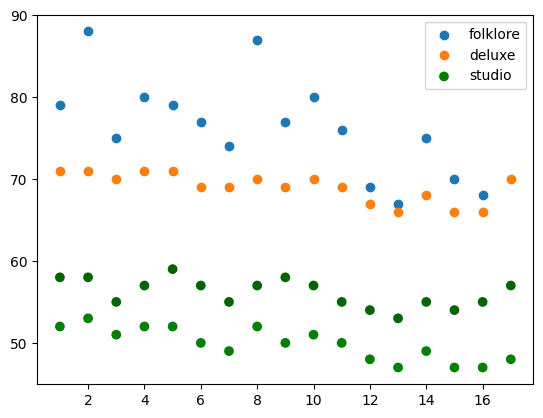

In [144]:

folklore = songs[songs['album'] == 'folklore']
deluxe = songs[songs['album'] == 'folklore (deluxe version)']
studio = songs[songs['album'] == 'folklore: the long pond studio sessions (from the Disney+ special) [deluxe edition]']

plt.scatter(folklore['track_number'], folklore['popularity'])
plt.scatter(deluxe['track_number'], deluxe['popularity'])
plt.scatter(studio['track_number'], studio['popularity'], c = ['green']* (len(studio)//2) + ['darkgreen']*(len(studio)//2))
plt.legend(['folklore', 'deluxe', 'studio'])
plt.show()

Midnights

In [ ]:
midnight = songs[songs['album'] == 'Midnights']
threeam = songs[songs['album'].str.contains('3am', case=False)]
untilmidnight = songs[songs['album'].str.contains('The Til Dawn Edition', case=False)]

plt.scatter(midnight['track_number'], midnight['popularity'])
plt.scatter(threeam['track_number'], threeam['popularity'])
plt.scatter(untilmidnight['track_number'], untilmidnight['popularity'])
plt.legend(['Midnight', '3am', 'til the dawn'])
plt.show()

#songs.scatter(songs['album'], songs['popularity'])
from itertools import zip_longest
print( list(s1 for s2, s1 in zip_longest(threeam['name'], untilmidnight['name']) if s1 != s2 ))

Converting Release date to Datetime / int

We leave the songs as this (don't need to merge) with only a not_first_release indicator.

In [169]:
first_release_indexes = songs.groupby('name').apply(lambda group: group.index.max(), include_groups=False)

songs['not_first_release'] = songs.index != songs['name'].map(first_release_indexes)
songs['not_first_release'] &= ~songs['performed_live']

songs[songs['album'].str.contains('1989 (', regex=False)][['name', 'album', 'not_first_release']]

,name,album,not_first_release
0,Welcome To New York (Taylor's Version),1989 (Taylor's Version) [Deluxe],True
1,Blank Space (Taylor's Version),1989 (Taylor's Version) [Deluxe],True
2,Style (Taylor's Version),1989 (Taylor's Version) [Deluxe],True
3,Out Of The Woods (Taylor's Version),1989 (Taylor's Version) [Deluxe],True
4,All You Had To Do Was Stay (Taylor's Version),1989 (Taylor's Version) [Deluxe],True
5,Shake It Off (Taylor's Version),1989 (Taylor's Version) [Deluxe],True
6,I Wish You Would (Taylor's Version),1989 (Taylor's Version) [Deluxe],True
7,Bad Blood (Taylor's Version),1989 (Taylor's Version) [Deluxe],True
8,Wildest Dreams (Taylor's Version),1989 (Taylor's Version) [Deluxe],True
9,How You Get The Girl (Taylor's Version),1989 (Taylor's Version) [Deluxe],True


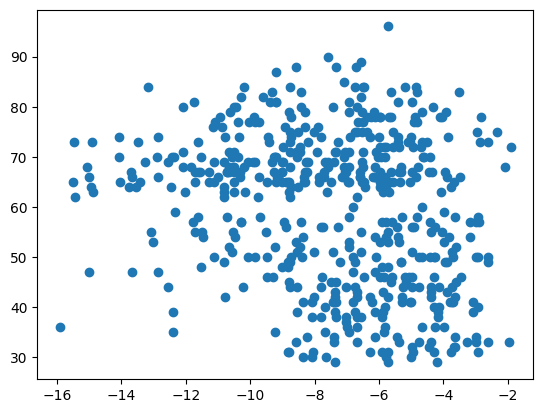

In [20]:
plt.scatter(songs['loudness'], songs['popularity'],)


In [21]:
# chech is a song name is unique:
songs['name'].value_counts()
songs[songs['name'] == 'Love Story']

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,performed_live,taylors_version,deluxe_album
483,Love Story,Fearless Platinum Edition,2008.860731,9,0.157,0.618,0.736,0.0,0.0730,-3.937,0.0308,118.982,0.307,49,235280,False,False,True
496,Love Story,Fearless,2008.860731,3,0.170,0.618,0.741,0.0,0.0822,-3.950,0.0310,118.984,0.296,67,235266,False,False,False


In [22]:
print(len(songs[songs['album'] == 'Midnights']))

print(len(songs[songs['album'] == 'Midnights (3am Edition)']))

print(len(songs[songs['album'] == 'Midnights (The Til Dawn Edition)']))

13
20
23


In [23]:
len(songs[songs['name'] == 'Anti-Hero'])

3

In [24]:
# print the dataset sorted by release date


In [148]:
idx = [i for i in range(2,14)] # numeric data
corr = songs.iloc[:, idx].corr()
#corr.style.background_gradient(cmap='coolwarm')
sns.heatmap(corr)
plt.show()

ValueError: could not convert string to float: '2023-10-27'

Problemes: veiem com acousticness, danceability, enrgy i loudness estan totes relacionades entre elles. A més a més, relase_date i popularity fortament correlades (ja ho sabíem).

### Popularity vs time:

Popularity vs time

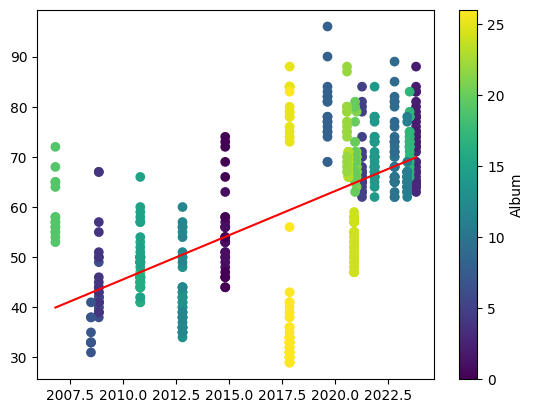

1.7619623268353404 -3495.9791890539886


In [26]:

# Scatter plot
plt.scatter(songs['release_date'], songs['popularity'], c=songs['album'].astype('category').cat.codes)
plt.colorbar(label='Album')

# Linear regression line
x = songs['release_date']
y = songs['popularity']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()
print(m, b)

Difference from regression line in popularity vs time 

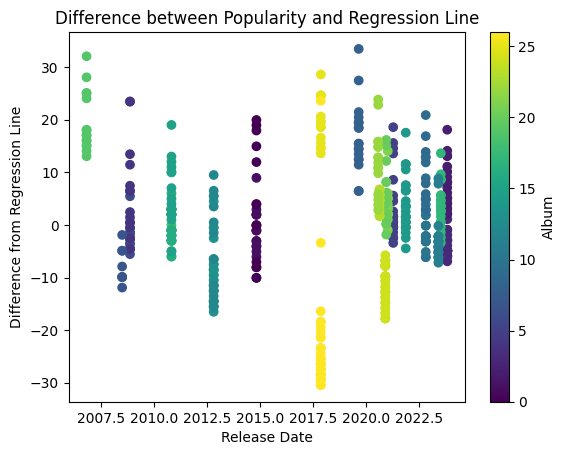

In [27]:
# Scatter plot
plt.scatter(x, y - (m*x + b), c=songs['album'].astype('category').cat.codes)
plt.colorbar(label='Album')

plt.xlabel('Release Date')
plt.ylabel('Difference from Regression Line')
plt.title('Difference between Popularity and Regression Line')
plt.show()


Popularity vs time without live performances

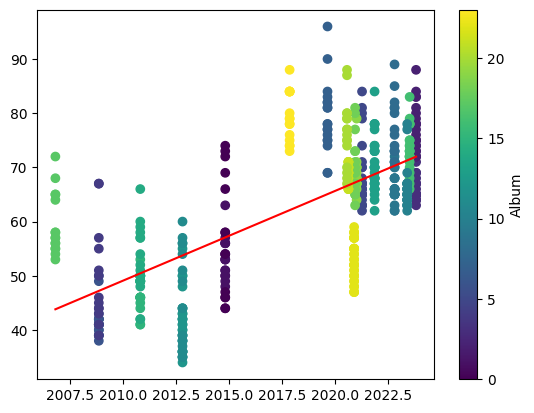

1.6561814155755255 -3279.831071424405


In [28]:

songs_without_live = songs[songs['performed_live'] == False]

# Scatter plot
plt.scatter(songs_without_live['release_date'], songs_without_live['popularity'], c=songs_without_live['album'].astype('category').cat.codes)
plt.colorbar(label='Album')

# Linear regression line
x1 = songs_without_live['release_date']
y1 = songs_without_live['popularity']
m, b = np.polyfit(x1, y1, 1)
plt.plot(x1, m*x1 + b, color='red')

plt.show()
print(m, b)

### Popularity vs mean by album

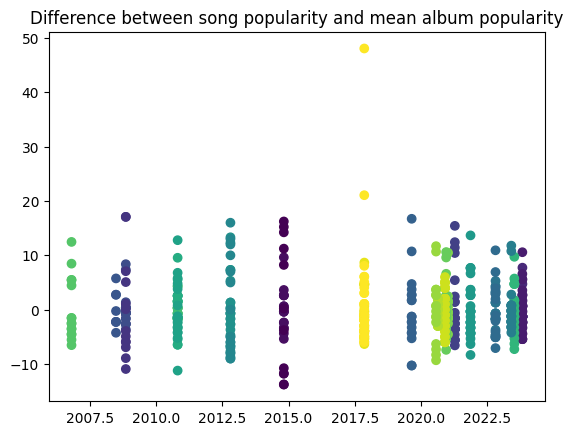

In [29]:
albums = songs.groupby('album')['popularity'].mean()

plt.scatter(songs['release_date'], songs['popularity'] - albums[songs['album']].values, c=songs['album'].astype('category').cat.codes)
plt.title("Difference between song popularity and mean album popularity")
plt.show()

#### Solving relase_date and popularity correlation:

the variable release_date contains vairability that is very hard to explain if we want to create a model that predicst popularity with only the parameters established earlier. Therefore, we have to delete it

In [30]:
songs = songs.drop(columns=['release_date'])

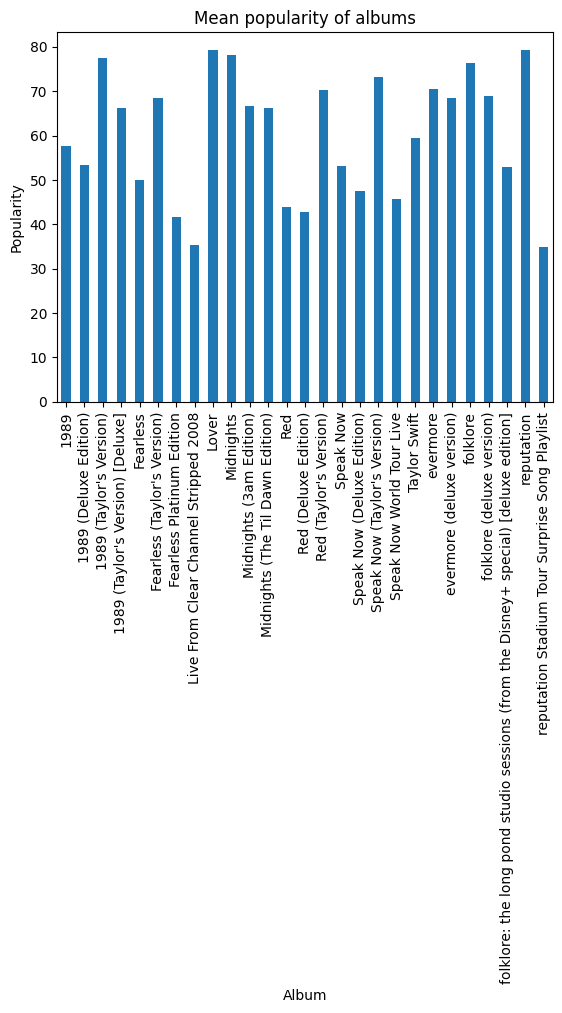

In [31]:
grouped_songs = songs.groupby('album')['popularity'].mean()
grouped_songs.plot(kind='bar')
plt.xlabel('Album')
plt.ylabel('Popularity')
plt.title('Mean popularity of albums')
plt.show()

### Checking datatypes

In [32]:
songs.dtypes

name                 object
album                object
track_number          int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity            int64
duration_ms           int64
performed_live         bool
taylors_version        bool
deluxe_album           bool
dtype: object

### Feature Scaling

Popularity scaling

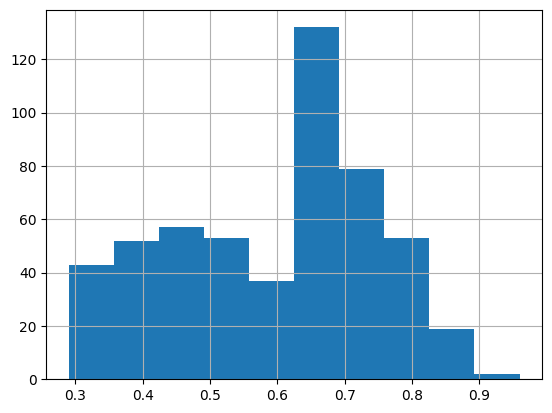

In [33]:
# Popularity [0,1]
songs_scaled = songs.copy()
songs_scaled['popularity'] = songs['popularity']/100
songs_scaled['popularity'].hist()
plt.show()

Duration Scaling (from ms to s)

In [34]:
# duration ms to s
songs_scaled['duration'] = songs_scaled['duration_ms'] / 1000
songs_scaled['duration'] = songs_scaled['duration'].astype(int)

songs_scaled = songs_scaled.drop(columns=['duration_ms'])

songs_scaled['duration'].head()

0    212
1    231
2    231
3    235
4    193
Name: duration, dtype: int32

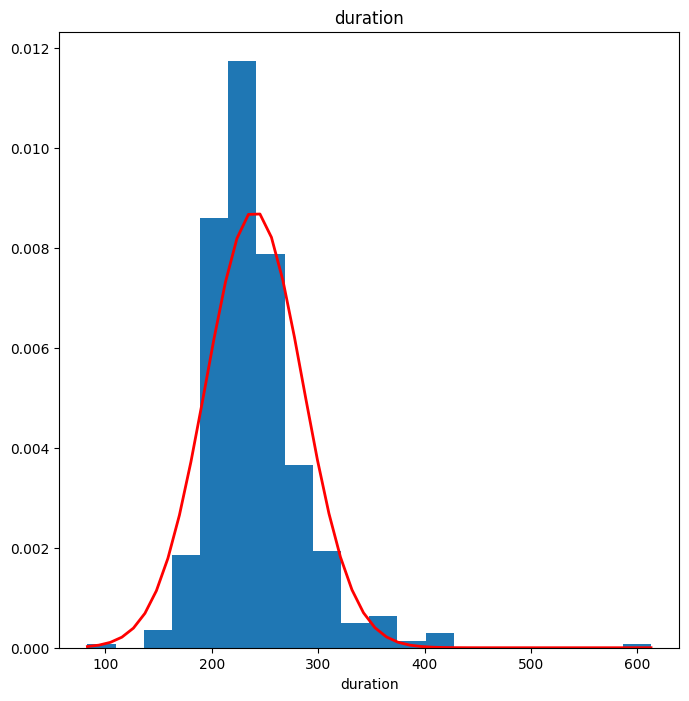

In [35]:
sigma=  songs_scaled.duration.std()
mu=  songs_scaled.duration.mean()
fig, ax = plt.subplots(figsize=(8,8))
count, bins, ignored = plt.hist(songs_scaled.duration, 20, density=True)
dbins = np.linspace(bins[0], bins[-1])
plt.title("duration")
ax.set_xlabel("duration")
plt.plot(dbins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (dbins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r');

In [36]:

# popularity vs duration
plt.scatter(songs_scaled['duration'], songs_scaled['popularity'], c = songs_scaled['release_date'])
plt.colorbar(label='Time')

# Linear regression line
x = songs_scaled['duration']
y = songs_scaled['popularity']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()
print(m, b)

# NO té sentit categoritzar 'duration': per exemple 'short', 'average', 'long'




KeyError: 'release_date'

In [ ]:
# Scatter plot
plt.scatter(songs_scaled['release_date'], songs_scaled['duration'])

# Linear regression line
x = songs_scaled['release_date']
y = songs_scaled['duration']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')

plt.show()
print(m, b)


We see that the duration of songs remains constant over time. We can't see a clear correlation between the song being 'short', 'medium' or 'long', so we might prefer to keep duration as a numeric variable instead of a categorical one.

Danceability, tempo, energy are all very correlated: we will try to create a new variable that combines them

We saw earlirer that these variables are correlated together, so in a future we might do future engineering to join them into a single one.

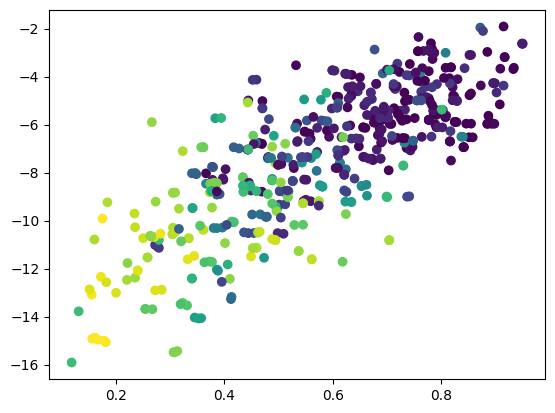

In [41]:
plt.scatter(songs_scaled['energy'], songs_scaled['loudness'], c = songs_scaled['acousticness'])
plt.show()

Instrumentalness

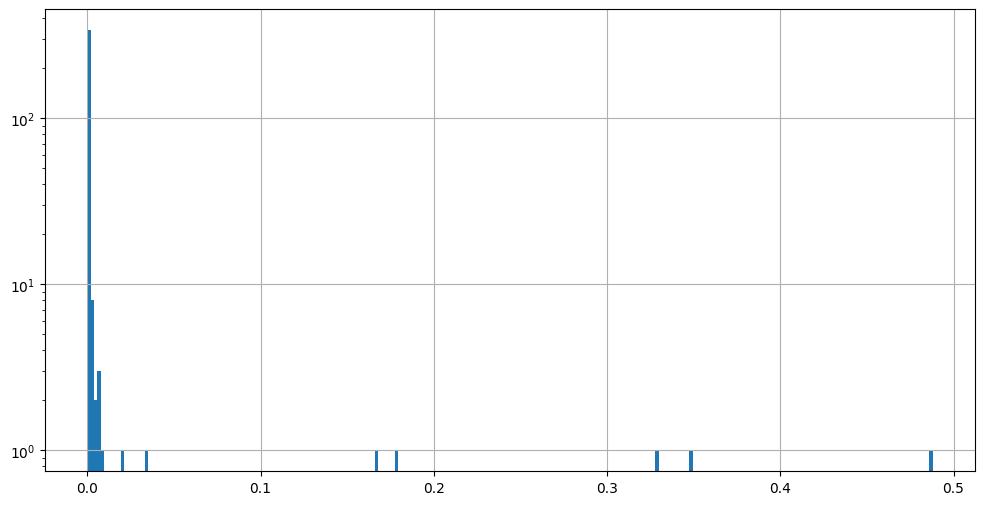

In [ ]:
songs_without_deluxe['instrumentalness'].hist(bins=250, log=True)

plt.show()

In [ ]:
songs['low_instrumentalness'] = 0.25 > songs['instrumentalness'] >= 0.05
songs['medium_instrumentalness'] = songs['instrumentalness'] >= 0.25

Valence

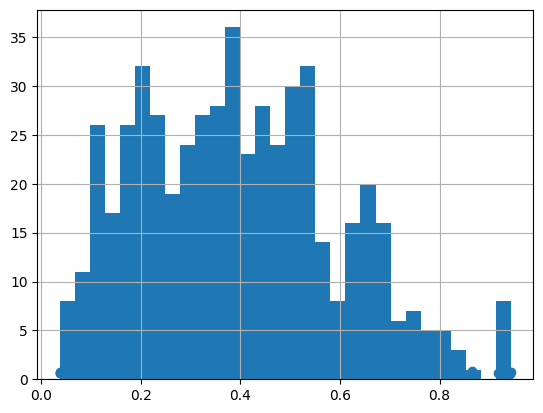

In [88]:
songs['valence'].hist(bins = 30)
songs.loc[songs['valence'] > 0.93]


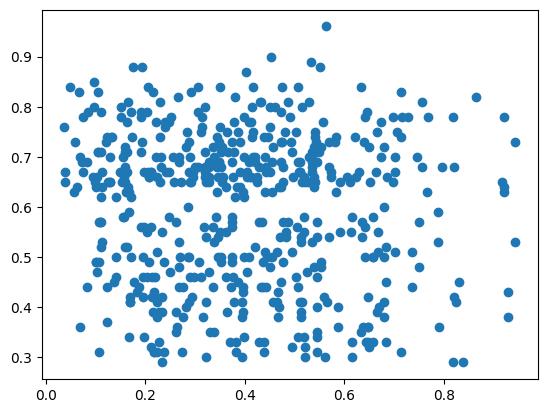

In [108]:

plt.scatter(songs_scaled['valence'], songs_scaled['popularity'])
plt.show()

Tempo

<Axes: >

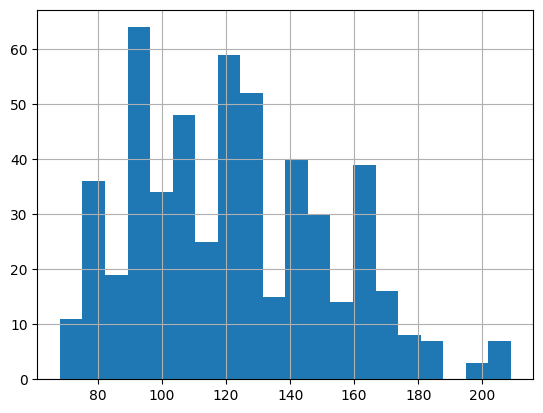

In [117]:
songs['tempo'].hist(bins = 15)

,name,album,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,performed_live,taylors_version,deluxe_album,duration
142,Better Man (Taylor's Version) (From The Vault),Red (Taylor's Version),22,0.2140,0.473,0.579,0.000000,0.0877,-5.824,0.0384,73.942,0.255,0.70,False,True,False,297
181,tolerate it,evermore (deluxe version),5,0.8780,0.316,0.361,0.000027,0.0797,-10.381,0.0488,74.952,0.221,0.70,False,False,True,245
198,tolerate it,evermore,5,0.8780,0.316,0.361,0.000027,0.0797,-10.381,0.0488,74.952,0.221,0.77,False,False,False,245
234,this is me trying - the long pond studio sessions,folklore: the long pond studio sessions (from ...,9,0.9280,0.435,0.332,0.000898,0.0867,-11.611,0.0310,68.097,0.157,0.58,False,False,True,209
278,Lover,Lover,3,0.4920,0.359,0.543,0.000016,0.1180,-7.582,0.0919,68.534,0.453,0.90,False,False,False,221
292,It’s Nice To Have A Friend,Lover,17,0.9710,0.737,0.175,0.000337,0.1710,-9.912,0.0401,70.008,0.545,0.69,False,False,False,150
300,So It Goes...,reputation,7,0.1220,0.574,0.610,0.000001,0.1300,-7.283,0.0732,74.957,0.374,0.73,False,False,False,227
321,So It Goes...,reputation Stadium Tour Surprise Song Playlist,13,0.1220,0.574,0.610,0.000001,0.1300,-7.283,0.0732,74.957,0.374,0.56,True,False,False,227
341,Breathe,reputation Stadium Tour Surprise Song Playlist,33,0.4160,0.442,0.480,0.000000,0.1290,-7.405,0.0281,73.849,0.167,0.34,True,False,False,264
500,Breathe,Fearless,7,0.3790,0.505,0.482,0.000000,0.1130,-7.372,0.0276,73.975,0.184,0.43,False,False,False,263


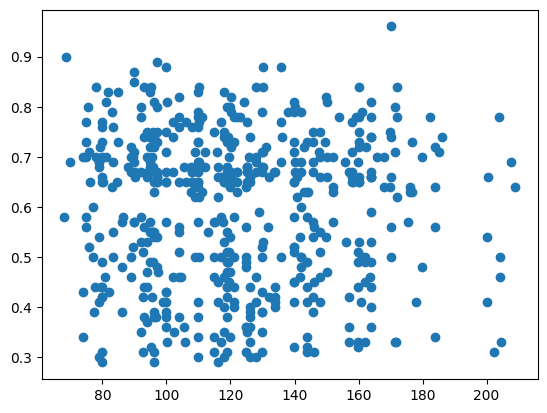

In [141]:
plt.scatter(songs_scaled['tempo'], songs_scaled['popularity'])

songs_scaled.loc[songs_scaled['tempo'] < 75]


Speechiness

<Axes: >

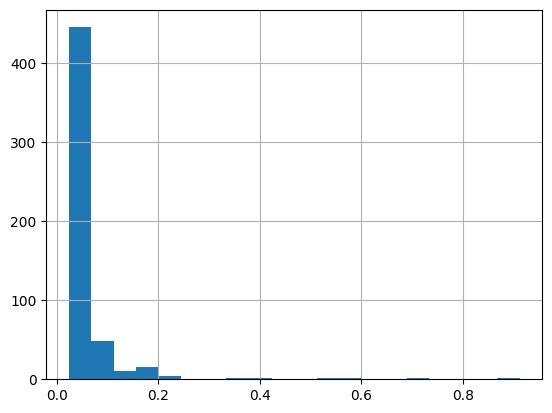

In [151]:
songs['speechiness'].hist(bins = 20)

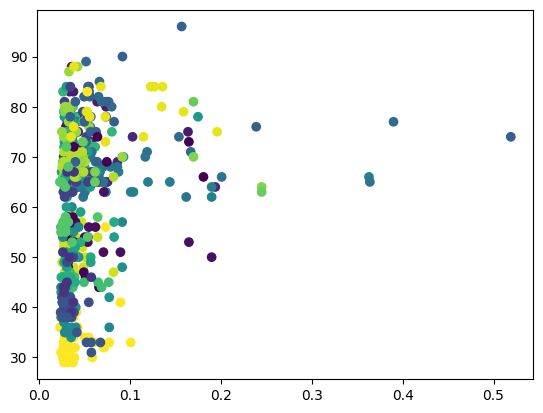

In [165]:
plt.scatter(songs['speechiness'], songs['popularity'], c=songs['album'].astype('category').cat.codes)

In [166]:
songs.loc[songs['speechiness'] > 0.3]

,name,album,release_date,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
72,Vigilante Shit,Midnights (The Til Dawn Edition),2023-05-26,8,0.157,0.867,0.272,0.000034,0.1180,-11.014,0.363,79.962,0.157,66,164801
95,Vigilante Shit,Midnights (3am Edition),2022-10-22,8,0.160,0.870,0.279,0.000017,0.1210,-11.134,0.364,79.996,0.160,65,164801
115,Vigilante Shit,Midnights,2022-10-21,8,0.173,0.798,0.277,0.000053,0.1210,-11.096,0.390,79.846,0.163,77,164801
276,I Forgot That You Existed,Lover,2019-08-23,1,0.298,0.664,0.316,0.000002,0.0812,-10.345,0.519,92.875,0.541,74,170640


### Normalizing variables

In [ ]:
# TODO